imports the TensorFlow library and the os module in Python

In [2]:
import tensorflow as tf
import os

The  code mounts the Google Drive to the Colab notebook environment at the specified directory "/content/drive". It enables access to files and directories stored in the Google Drive within the Colab environment.







In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
import cv2
import imghdr

Defining a list of common image file extensions and setting the directory path to '/content/drive/MyDrive/new_dataset'.

In [6]:
image_exts = ['jpg','jpeg','bmp','png']
data_dir = '/content/drive/MyDrive/scddl'

[link text](https:// [link text](https://))
The code is used to perform data augmentation on images in the 'positive' and 'negative' directories. Data augmentation is a technique used to artificially increase the size of a training dataset by applying transformations to the existing images, such as flipping, rotating, or cropping.

This code checks each image file in the directory specified by data_dir. It verifies if the image format is within the allowed formats, deleting images that don't match and reporting any issues encountered during the process.








In [8]:
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e:
#             print('issue with image {}'.format(image_path))

tf.data.Dataset is a TensorFlow class for representing sequences of data elements. It enables efficient handling and preprocessing of large datasets for machine learning tasks.








In [9]:
tf.data.Dataset??

Imports the NumPy library with the alias `np` and imports the `pyplot` module from the Matplotlib library with the alias `plt`.

In [10]:
import numpy as np
from matplotlib import pyplot as plt

Creates a TensorFlow dataset from images stored in the directory '/content/drive/MyDrive/new_dataset', with a batch size of 16.
2560

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/scddl', batch_size=16)

Found 2560 files belonging to 2 classes.


Loads images from a directory and returns a tf.data.Dataset.

In [12]:
tf.keras.utils.image_dataset_from_directory??


Converts the image dataset `data` into a numpy iterator `data_iterator` for accessing the data in memory.

In [13]:
# the data var is not loaded into memory (jus[t a generator) so w need to load it like so
data_iterator = data.as_numpy_iterator()

Creates a batch of data from the `data_iterator` by extracting a set of numpy arrays.

In [14]:
# splits the iterator into many batches and gets a batch from them
#  (set of numpy arrays)
batch = data_iterator.next()

Returns the length of the `batch`, which includes both the images (numpy arrays) and their corresponding labels.

In [15]:
len(batch)
# this result is because of having the set of pictures (numpy arrays) and their labels

2

Plots a grid of four images along with their corresponding labels. The images are taken from the first batch of the dataset. Each image is displayed in a subplot with its label as the title.

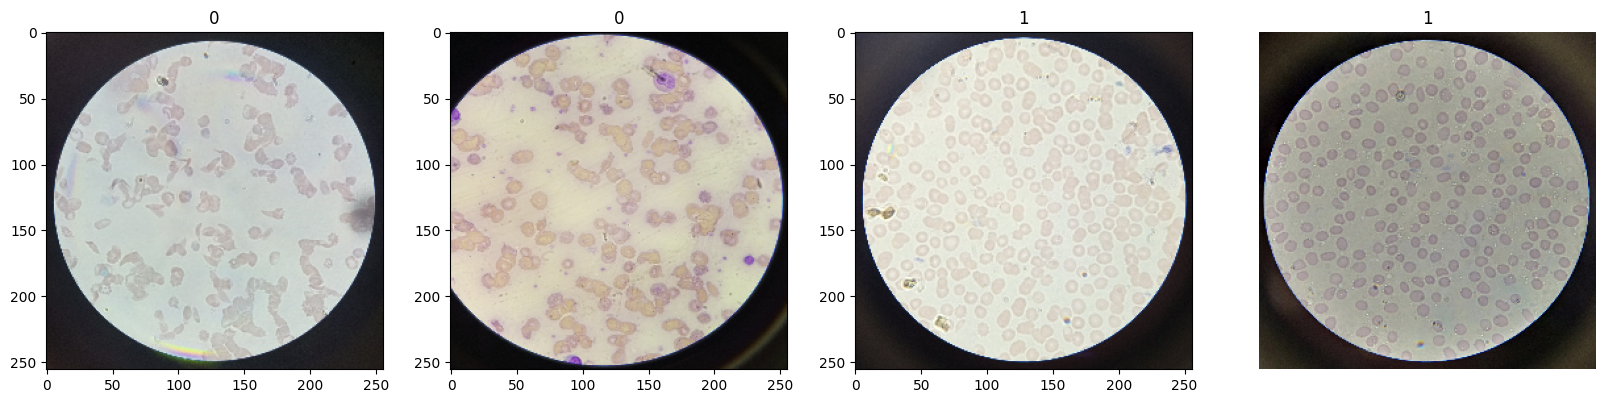

In [16]:
fig , ax = plt.subplots(ncols=4, figsize=(20,20))
plt.axis('off')

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# Preprocessing


The code scales the pixel values of the images in the batch to a range between 0 and 1 by dividing each pixel value by 255, which is the maximum pixel value for an 8-bit image. The result confirms that the maximum pixel value in the scaled images is now 1.*italicised text*

In [17]:
# we scale the values for better performances
scaled = batch[0] / 255

scaled.max()

1.0

The code snippet normalizes the pixel values of images in a dataset to the range [0, 1] by dividing each pixel value by 255, using a lambda function and the `map` function.

In [18]:
# apply the scaling for all the data (using lambda + map function)
data = data.map(lambda x,y: (x/255, y))

In [19]:
# verification of the max/min values
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

In [20]:
# len(data)


The training dataset size is \( \frac{2}{3} \) of the total data, the validation dataset size is \( \frac{1}{6} \) of the total data, and the test dataset size is also \( \frac{1}{6} \) of the total data.

In [21]:
# partitionning the dataset
train_size = int(len(data)*2/3)
val_size = int(len(data)/6)
test_size = int(len(data)/6)

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Building the Deep Learning model

In [23]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
model = Sequential()

In [25]:
# the deep neural network architecture

# the first layer is a convolution with 16 filters of 3*3 matrix kernels and a 1 pixel stride
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# it also contain a max pooling layer formed of 2*2 filters (N.B: max pooling takes the max of activation among small pixel batches of 2*2)
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [26]:
model.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [27]:
# see some statistics about the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [28]:
logdir='logs'
# usefull for investing in the logs of the model (in cas we want to save it at some particular point)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


In [55]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
106/106 [==============================] - 324s 3s/step - loss: 5.9379e-05 - accuracy: 1.0000 - val_loss: 0.2407 - val_accuracy: 0.9639
Epoch 2/20
106/106 [==============================] - 308s 3s/step - loss: 5.4380e-05 - accuracy: 1.0000 - val_loss: 0.1903 - val_accuracy: 0.9760
Epoch 3/20
106/106 [==============================] - 258s 2s/step - loss: 5.2283e-05 - accuracy: 1.0000 - val_loss: 0.2401 - val_accuracy: 0.9639
Epoch 4/20
106/106 [==============================] - 259s 2s/step - loss: 0.0010 - accuracy: 0.9994 - val_loss: 0.3582 - val_accuracy: 0.9567
Epoch 5/20
106/106 [==============================] - 264s 2s/step - loss: 0.1520 - accuracy: 0.9428 - val_loss: 0.2989 - val_accuracy: 0.9159
Epoch 6/20
106/106 [==============================] - 306s 3s/step - loss: 0.1064 - accuracy: 0.9676 - val_loss: 0.2447 - val_accuracy: 0.9495
Epoch 7/20
106/106 [==============================] - 304s 3s/step - loss: 0.0578 - accuracy: 0.9858 - val_loss: 0.1591 - val_accu

In [56]:
# see some statistics about the training
hist.history

{'loss': [5.937930109212175e-05,
  5.43802889296785e-05,
  5.228265217738226e-05,
  0.001043834607116878,
  0.1520226150751114,
  0.10638009011745453,
  0.05779176950454712,
  0.006218553055077791,
  0.0022697467356920242,
  0.000578013772610575,
  0.0003538704477250576,
  0.0002674160059541464,
  0.00022403609182219952,
  0.00021164698409847915,
  0.00015332324255723506,
  0.00012316761421971023,
  0.00010776735871331766,
  9.323265840066597e-05,
  9.118939487962052e-05,
  7.705864845775068e-05],
 'accuracy': [1.0,
  1.0,
  1.0,
  0.9994103908538818,
  0.942806601524353,
  0.9675707817077637,
  0.9858490824699402,
  0.9982311129570007,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.24072705209255219,
  0.19031967222690582,
  0.2401004135608673,
  0.3582434356212616,
  0.29888054728507996,
  0.24471229314804077,
  0.1591048538684845,
  0.17040807008743286,
  0.16338969767093658,
  0.17175839841365814,
  0.1557895541191101,
  0.15095

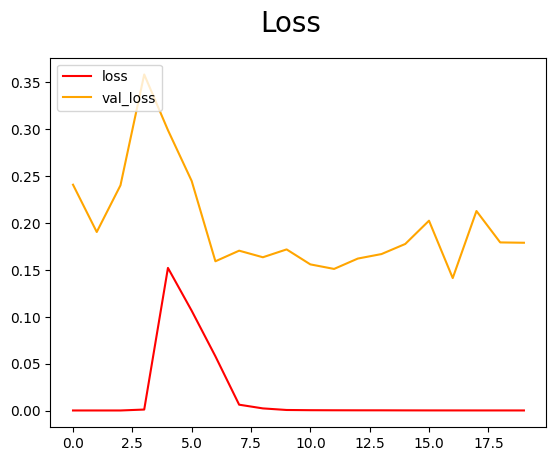

In [57]:
# loss statistics (train -> 'loss' / validation -> 'val loss )
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

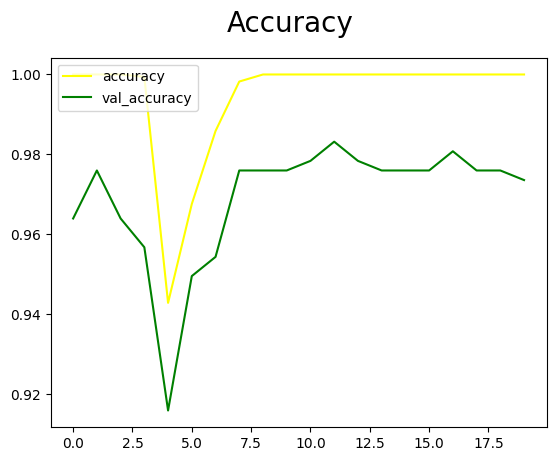

In [58]:
# loss statistics (train -> 'accuracy' / validation -> 'val accuracy )
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='yellow', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluation

In [59]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [60]:
    pre = Precision()
    re = Recall()
    acc = BinaryAccuracy()

In [61]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 237ms/step


In [62]:
print(' Precision : {}\n Recall : {}\n Accuracy : {}'.format(pre.result().numpy() , re.result().numpy(), acc.result().numpy()))

 Precision : 0.9650654792785645
 Recall : 0.9778761267662048
 Accuracy : 0.96875


# Save the model

In [63]:
from keras.models import load_model

In [64]:
model.save(os.path.join('models', 'sicklecelldetection.h5'))

In [65]:
# the manner to re-load it
new_model = load_model(os.path.join('models', 'sicklecelldetection.h5'))

In [ ]:
#new_model


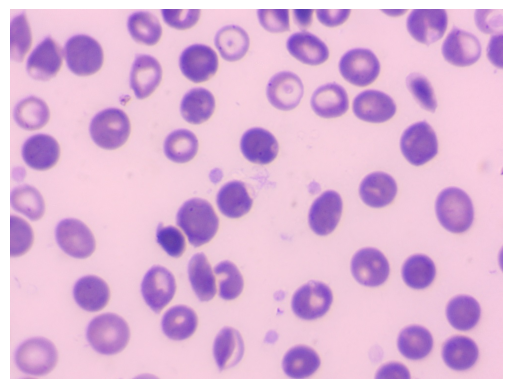

In [104]:
img = cv2.imread('/content/drive/MyDrive/155.jpg')
# cv2 saves images as BGR, so they might look
# weird when attempting to visualize them directly
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

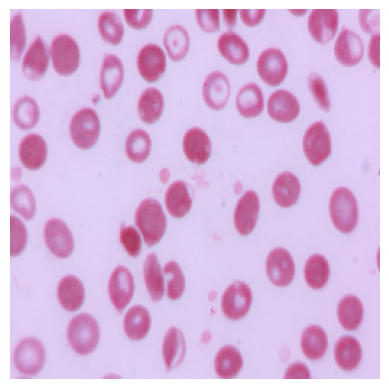

In [105]:
# the model only accepts 256*256 size images
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.axis('off')
plt.show()

In [106]:
# we use np.expand_dims because the model is expecting a batch, not only once picture
# therefore, we expand the dimensions of the picture
y_hat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [107]:
y_hat

array([[3.439421e-09]], dtype=float32)

In [108]:
if y_hat >0:
    print('the model says it is not a sickle cell ')
else:
    print('the model says it is a sickle cell ')


the model says it is not a sickle cell 


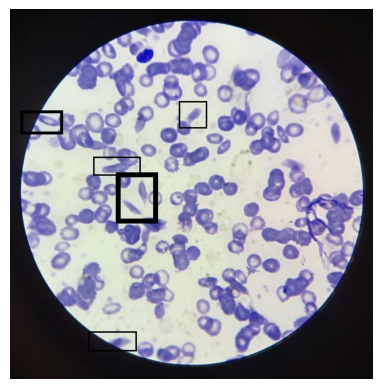

In [99]:
img = cv2.imread('/content/drive/MyDrive/scdimages/4.jpg')
# cv2 saves images as BGR, so they might look
# weird when attempting to visualize them directly
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

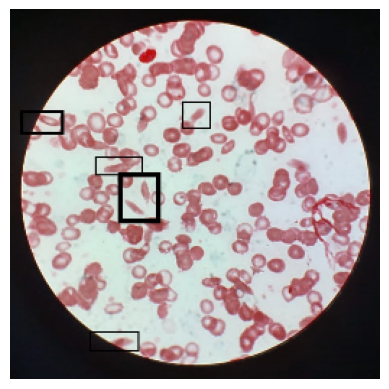

In [100]:
# the model only accepts 256*256 size images
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.axis('off')
plt.show()

In [101]:
# we use np.expand_dims because the model is expecting a batch, not only once picture
# therefore, we expand the dimensions of the picture
y_hat1 = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 92ms/step


In [102]:
y_hat1

array([[0.]], dtype=float32)

In [103]:
if y_hat1 >0:
    print('the model says it is not a sickle cell ')
else:
    print('the model says it is a sickle cell ')

the model says it is a sickle cell 
